'Before Filtering the shape (1047812, 40)'

'After Filter the shape (56420, 40)'

'Desire Filter shape (56420, 19)'

Schema([('HH_Size_FDQ', Int16),
        ('Engaged_in_Economic_Activity_Las', Int16),
        ('Max_Income_Activity', Int16),
        ('Self_Employment_Source_Sector', Int16),
        ('Regular_Wage_Source_Sector', Int16),
        ('Casual_Labour_Source_Sector', Int16),
        ('Household_Type', Int16),
        ('Religion_of_HH_Head', Int16),
        ('Land_Ownership', Int16),
        ('Type_of_Land_Owned', Int16),
        ('Total_Area_Land_Owned_Acres', Int16),
        ('Dwelling_Unit_Exists', Int16),
        ('Type_of_Dwelling_Unit', Int16),
        ('Energy_Source_Cooking', Int16),
        ('Energy_Source_Lighting', Int16),
        ('Ration_Card_Type', Int16),
        ('Rent_Rate_Available_Rural', Int16),
        ('Benefitted_From_PMGKY', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
HH_Size_FDQ ---> 0.00%
Engaged_in_Economic_Activity_Las ---> 0.00%
Max_Income_Activity ---> 5.76%
Self_Employment_Source_Sector ---> 66.01%
Regular_Wage_Source_Sector ---> 96.60%
Casual_Labour_Source_Sector ---> 79.06%
Household_Type ---> 0.00%
Religion_of_HH_Head ---> 0.00%
Land_Ownership ---> 0.00%
Type_of_Land_Owned ---> 3.67%
Total_Area_Land_Owned_Acres ---> 100.00%
Dwelling_Unit_Exists ---> 0.00%
Type_of_Dwelling_Unit ---> 1.45%
Energy_Source_Cooking ---> 0.00%
Energy_Source_Lighting ---> 0.00%
Ration_Card_Type ---> 0.00%
Rent_Rate_Available_Rural ---> 40.26%
Benefitted_From_PMGKY ---> 0.00%
Multiplier ---> 89.81%


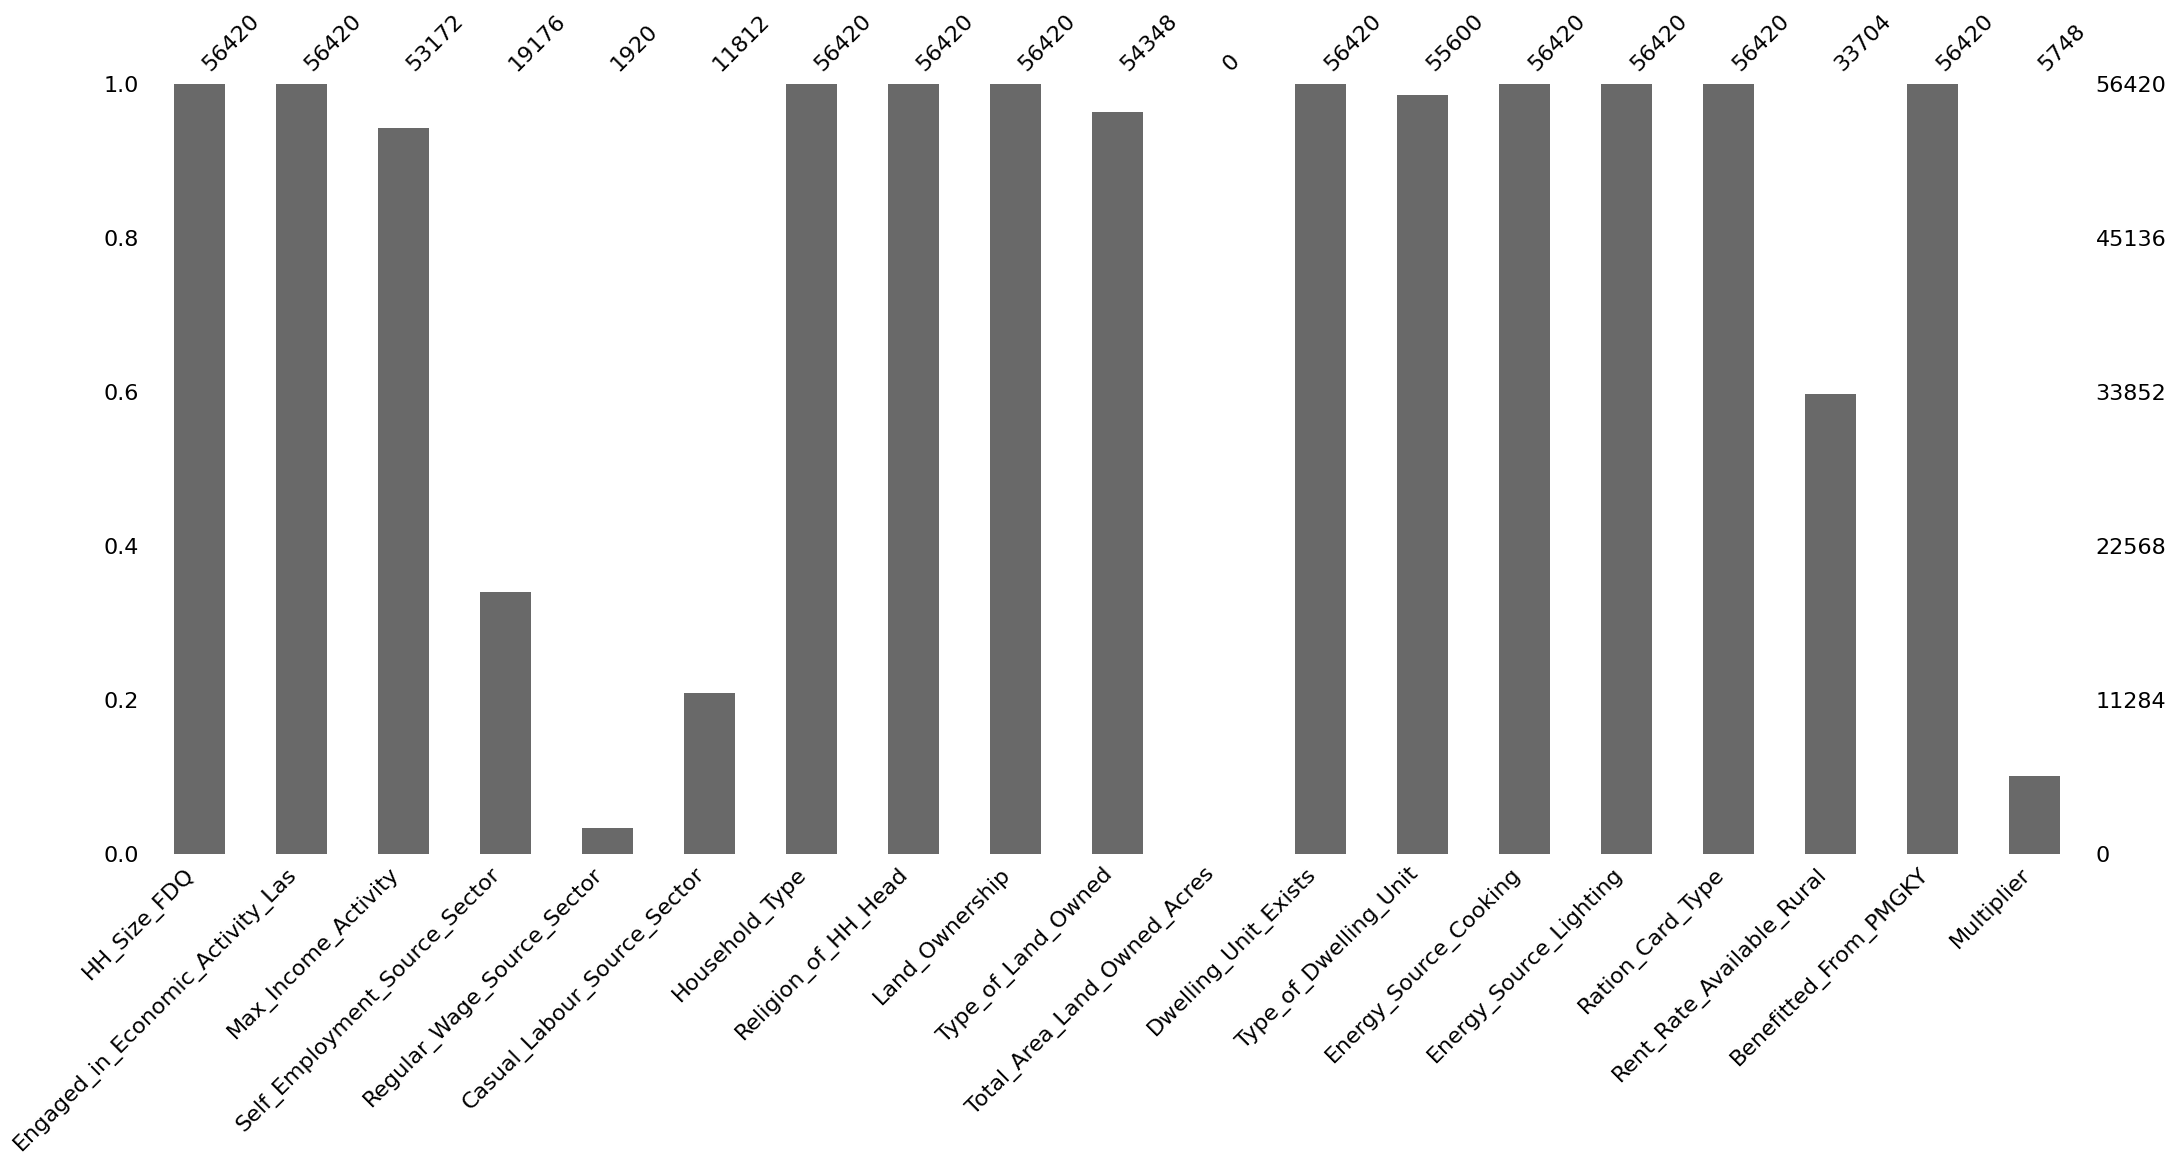

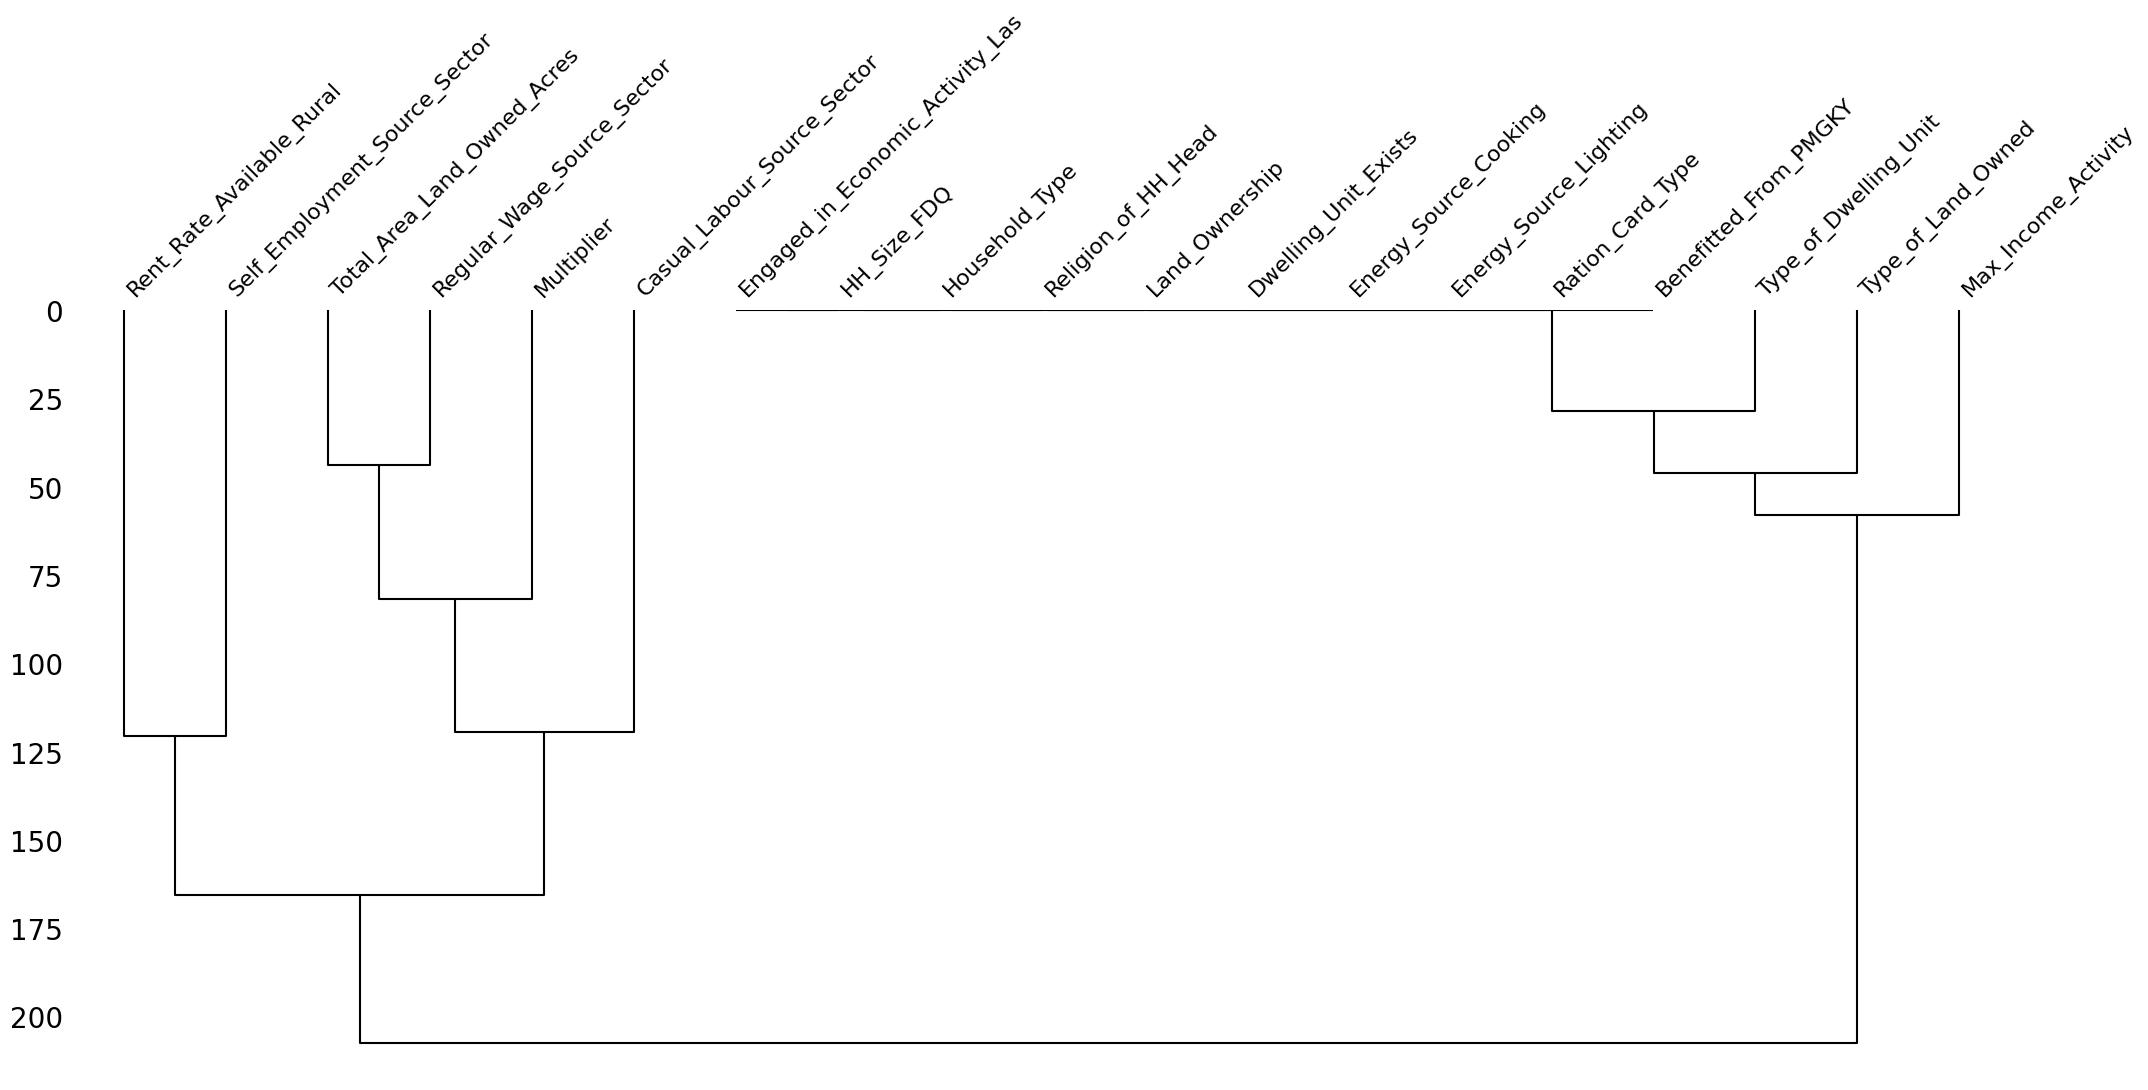

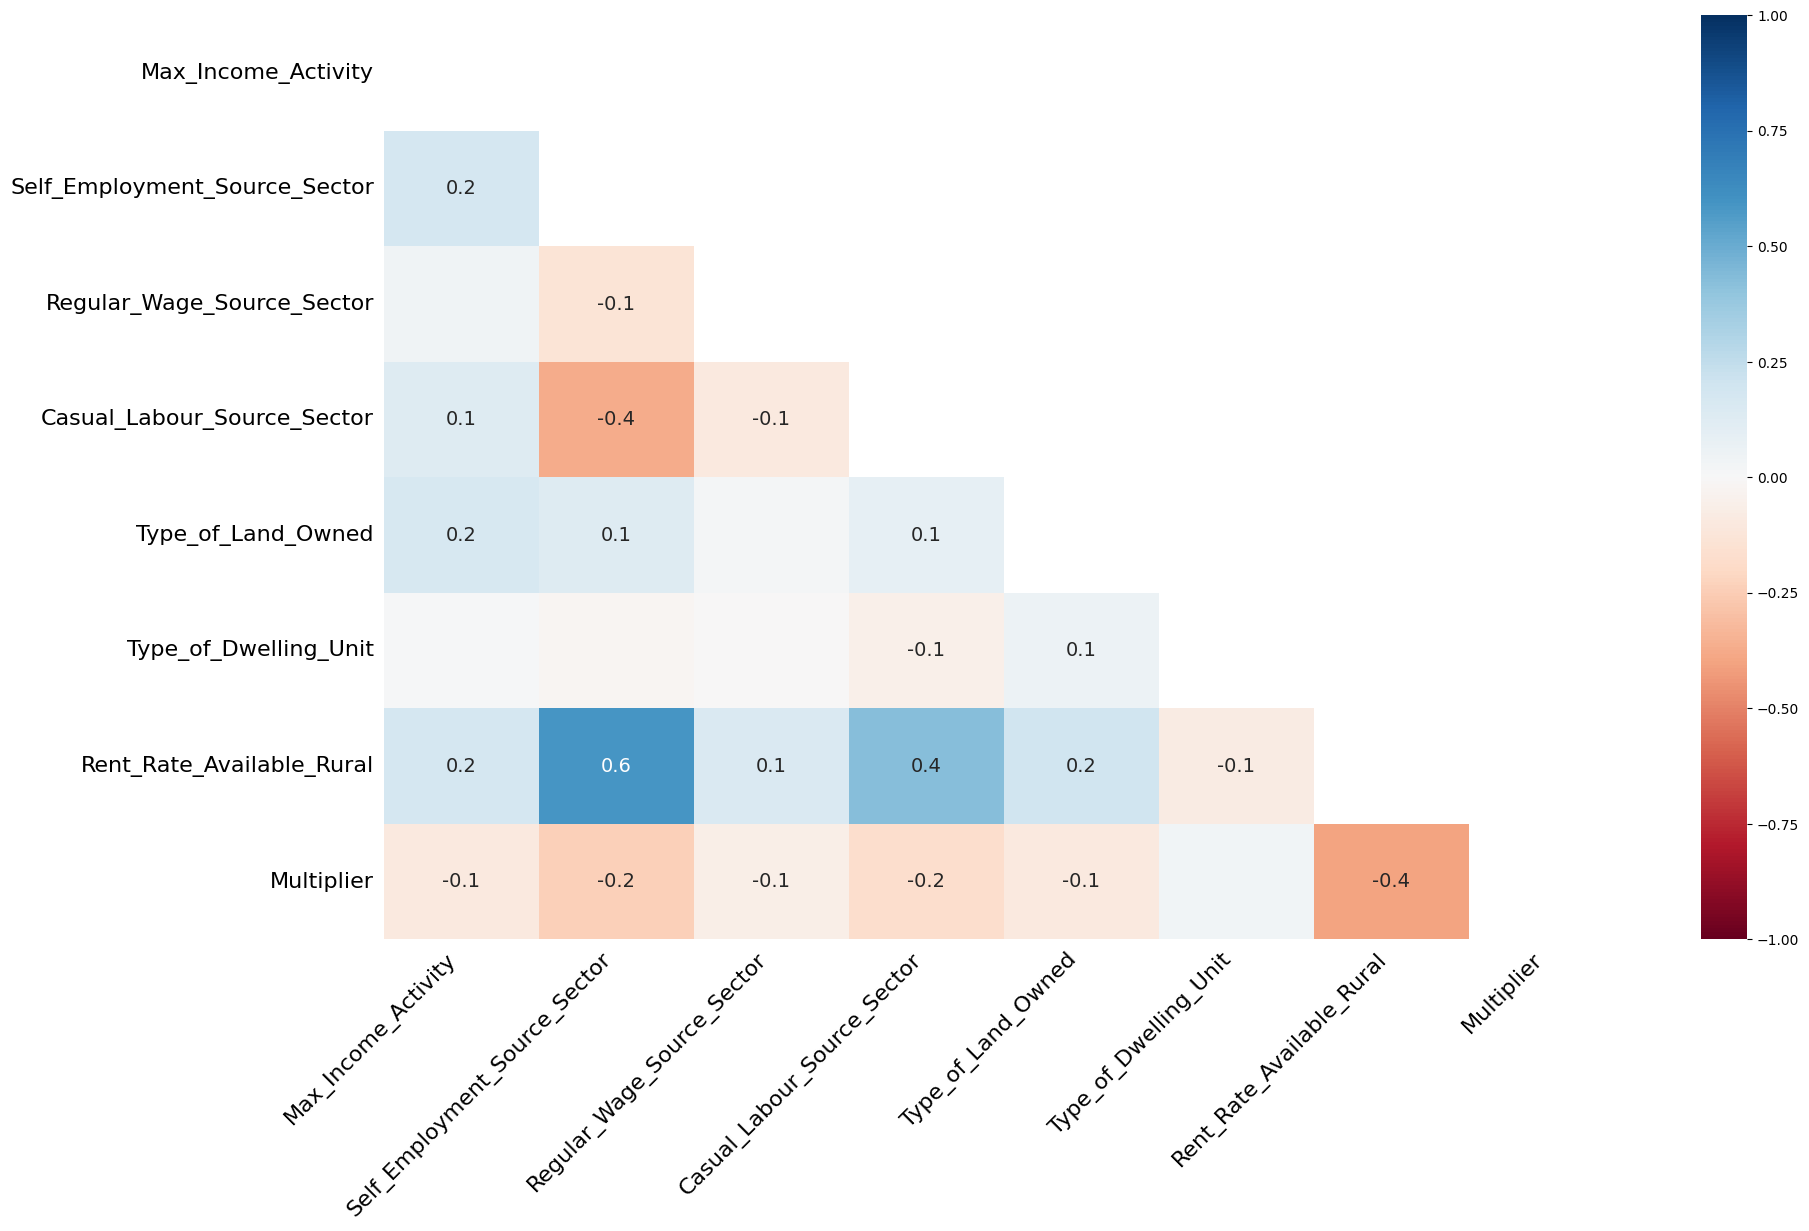

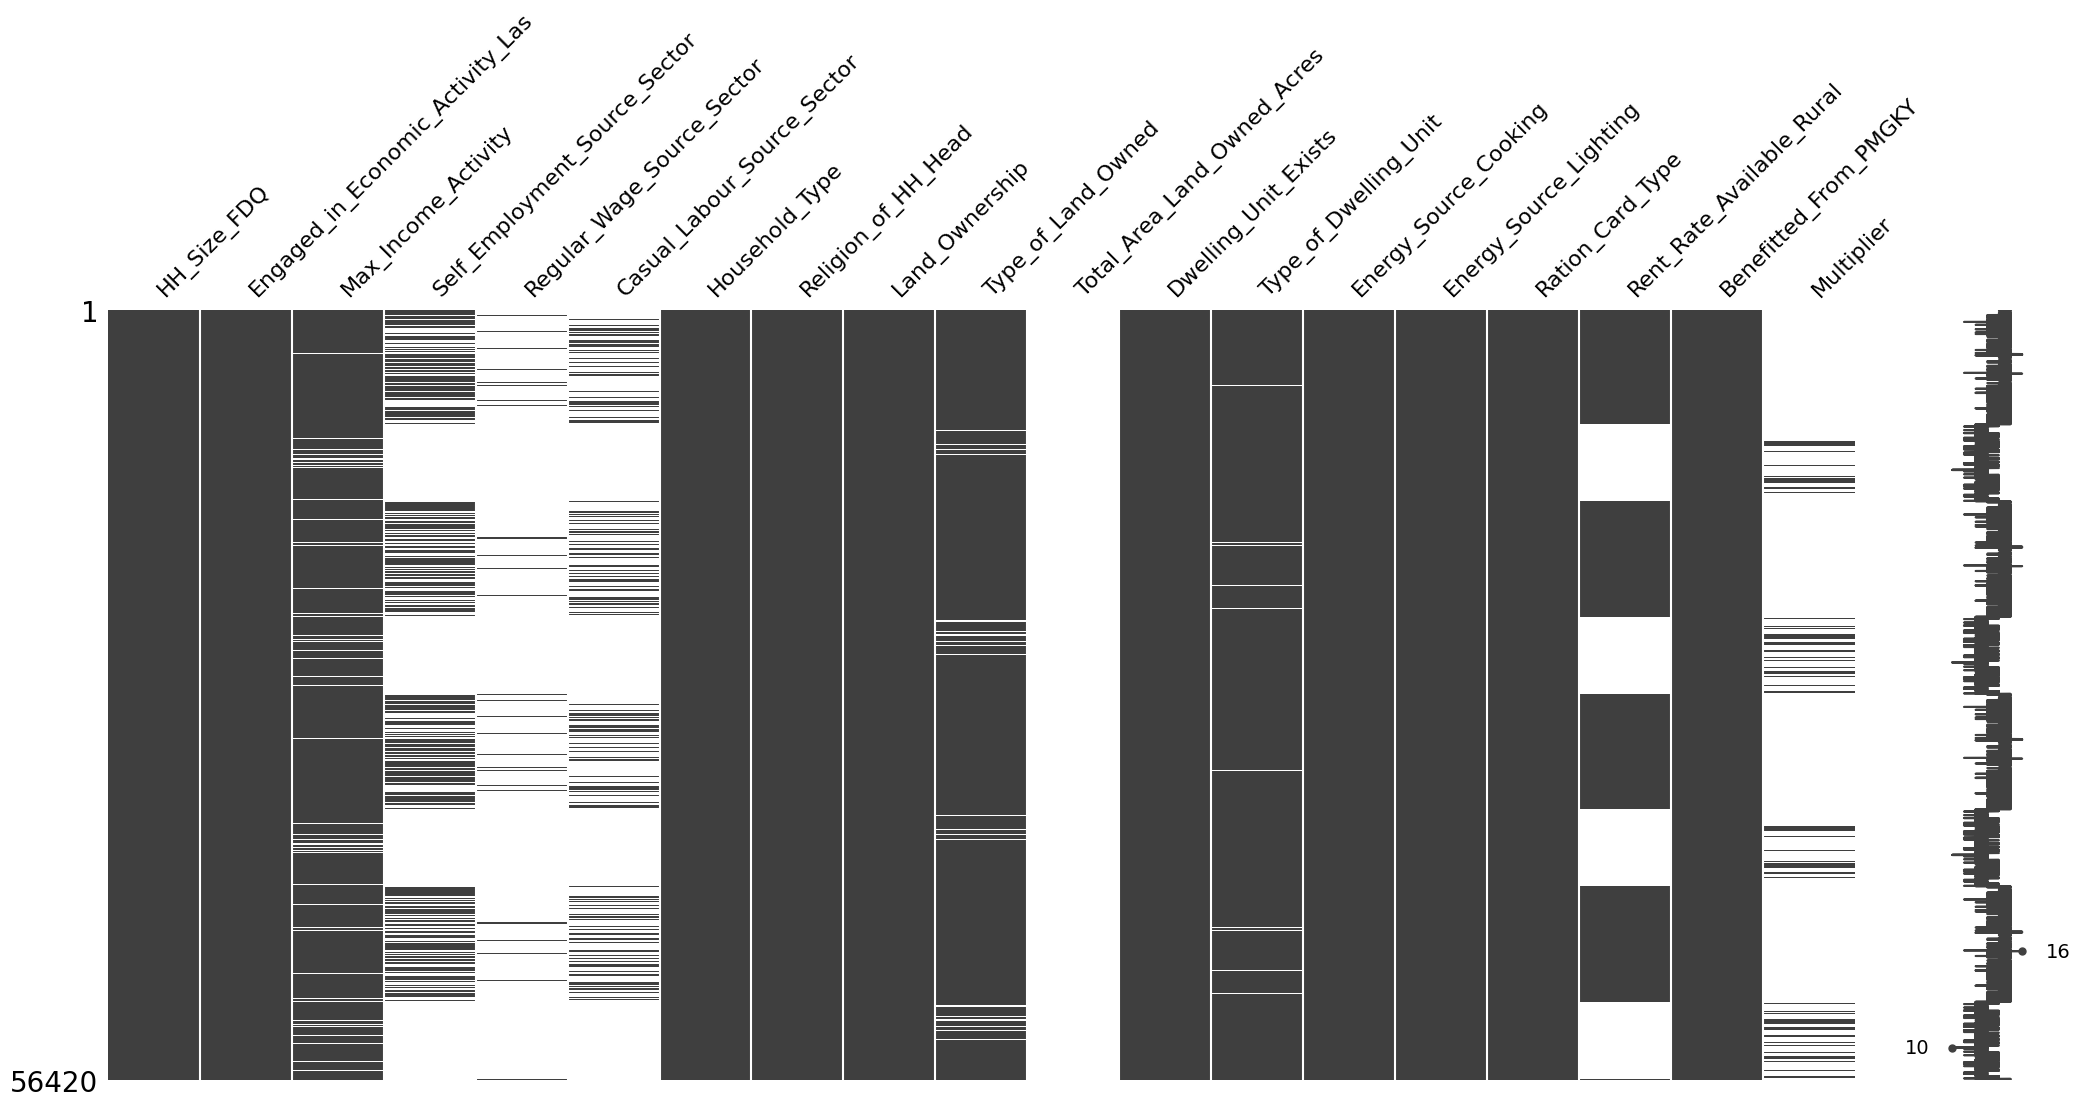

In [2]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data\lev-03_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'HH_Size_FDQ',
'Engaged_in_Economic_Activity_Las',
'Max_Income_Activity',
'Self_Employment_Source_Sector',
'Regular_Wage_Source_Sector',
'Casual_Labour_Source_Sector',
'Household_Type',
'Religion_of_HH_Head',
'Land_Ownership',
'Type_of_Land_Owned',
'Total_Area_Land_Owned_Acres',
'Dwelling_Unit_Exists',
'Type_of_Dwelling_Unit',
'Energy_Source_Cooking',
'Energy_Source_Lighting',
'Ration_Card_Type',
'Rent_Rate_Available_Rural',
'Benefitted_From_PMGKY',
'Multiplier'
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)